In [199]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import plotly.express as px
import mplcyberpunk
plt.style.use("cyberpunk")
%matplotlib inline

In [235]:
data_prcnt = pd.read_excel("% OF TOTAL UNITS SOLD.xlsx")

In [201]:
data_unit = pd.read_excel("UNITS SOLD.xlsx")

In [202]:
data_unit

,Year,Retail,Ecommerce,Partner,Direct Marketing,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2012,13490.000000,5010.000000,3500.000000,460.000000,22460.0,NaN,NaN,NaN,NaN,NaN
1,2013,13350.000000,5560.000000,3780.000000,447.000000,23137.0,NaN,NaN,NaN,NaN,NaN
2,2014,10463.000000,4249.000000,2946.000000,424.000000,18082.0,NaN,NaN,NaN,NaN,NaN
3,2015,13910.000000,6040.000000,3520.000000,410.000000,23880.0,NaN,NaN,NaN,NaN,NaN
4,2016,14360.000000,6690.000000,3770.000000,411.000000,25231.0,NaN,NaN,NaN,NaN,NaN
5,2017,14630.000000,7110.000000,4540.000000,483.000000,26763.0,NaN,NaN,NaN,NaN,NaN
6,2018,11490.000000,7380.000000,5230.000000,532.000000,24632.0,NaN,NaN,NaN,NaN,NaN
7,2019,10200.000000,7932.000000,7893.000000,509.000000,26534.0,NaN,NaN,NaN,NaN,NaN
8,2020,9500.000000,8000.000000,9500.000000,500.000000,27500.0,NaN,NaN,NaN,NaN,NaN
9,Growth,-0.295775,0.596806,1.714286,0.086957,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
cols = range(6,11)
data_unit.drop(data_unit.columns[cols], axis=1, inplace=True)

In [204]:
data_growth=data_unit.iloc[9]

In [205]:
data_unit.drop(9, inplace=True)

In [206]:
data_growth=pd.DataFrame(data_growth).T.drop(columns="Total").reset_index().drop(columns="index")

In [207]:
data_growth=data_growth.T.reset_index().drop(0).rename(columns={"index":"Sector",0:"Growth"})

In [208]:
data_growth['Growth']=(data_growth['Growth']*100)#.round(decimals=4)

In [217]:
data_growth['Growth'] = data_growth['Growth'].apply(lambda x:round(x,1))

In [218]:
data_growth

,Sector,Growth
1,Retail,-29.6
2,Ecommerce,59.7
3,Partner,171.4
4,Direct Marketing,8.7


In [137]:
data_unit

,Year,Retail,Ecommerce,Partner,Direct Marketing,Total
0,2012,13490.0,5010.0,3500.0,460.0,22460.0
1,2013,13350.0,5560.0,3780.0,447.0,23137.0
2,2014,10463.0,4249.0,2946.0,424.0,18082.0
3,2015,13910.0,6040.0,3520.0,410.0,23880.0
4,2016,14360.0,6690.0,3770.0,411.0,25231.0
5,2017,14630.0,7110.0,4540.0,483.0,26763.0
6,2018,11490.0,7380.0,5230.0,532.0,24632.0
7,2019,10200.0,7932.0,7893.0,509.0,26534.0
8,2020,9500.0,8000.0,9500.0,500.0,27500.0


In [138]:
data_prcnt

,Year,Retail,Ecommerce,Partner,Direct Marketing,Total
0,2012,0.600623,0.223063,0.155833,0.020481,1.0
1,2013,0.576998,0.240308,0.163375,0.019320,1.0
2,2014,0.578642,0.234985,0.162924,0.023449,1.0
3,2015,0.582496,0.252931,0.147404,0.017169,1.0
4,2016,0.569141,0.265150,0.149419,0.016289,1.0
5,2017,0.546650,0.265665,0.169637,0.018047,1.0
6,2018,0.466466,0.299610,0.212325,0.021598,1.0
7,2019,0.384412,0.298937,0.297467,0.019183,1.0
8,2020,0.345455,0.290909,0.345455,0.018182,1.0


In [139]:
data_unit['Year'][-2::]

7    2019
8    2020
Name: Year, dtype: object

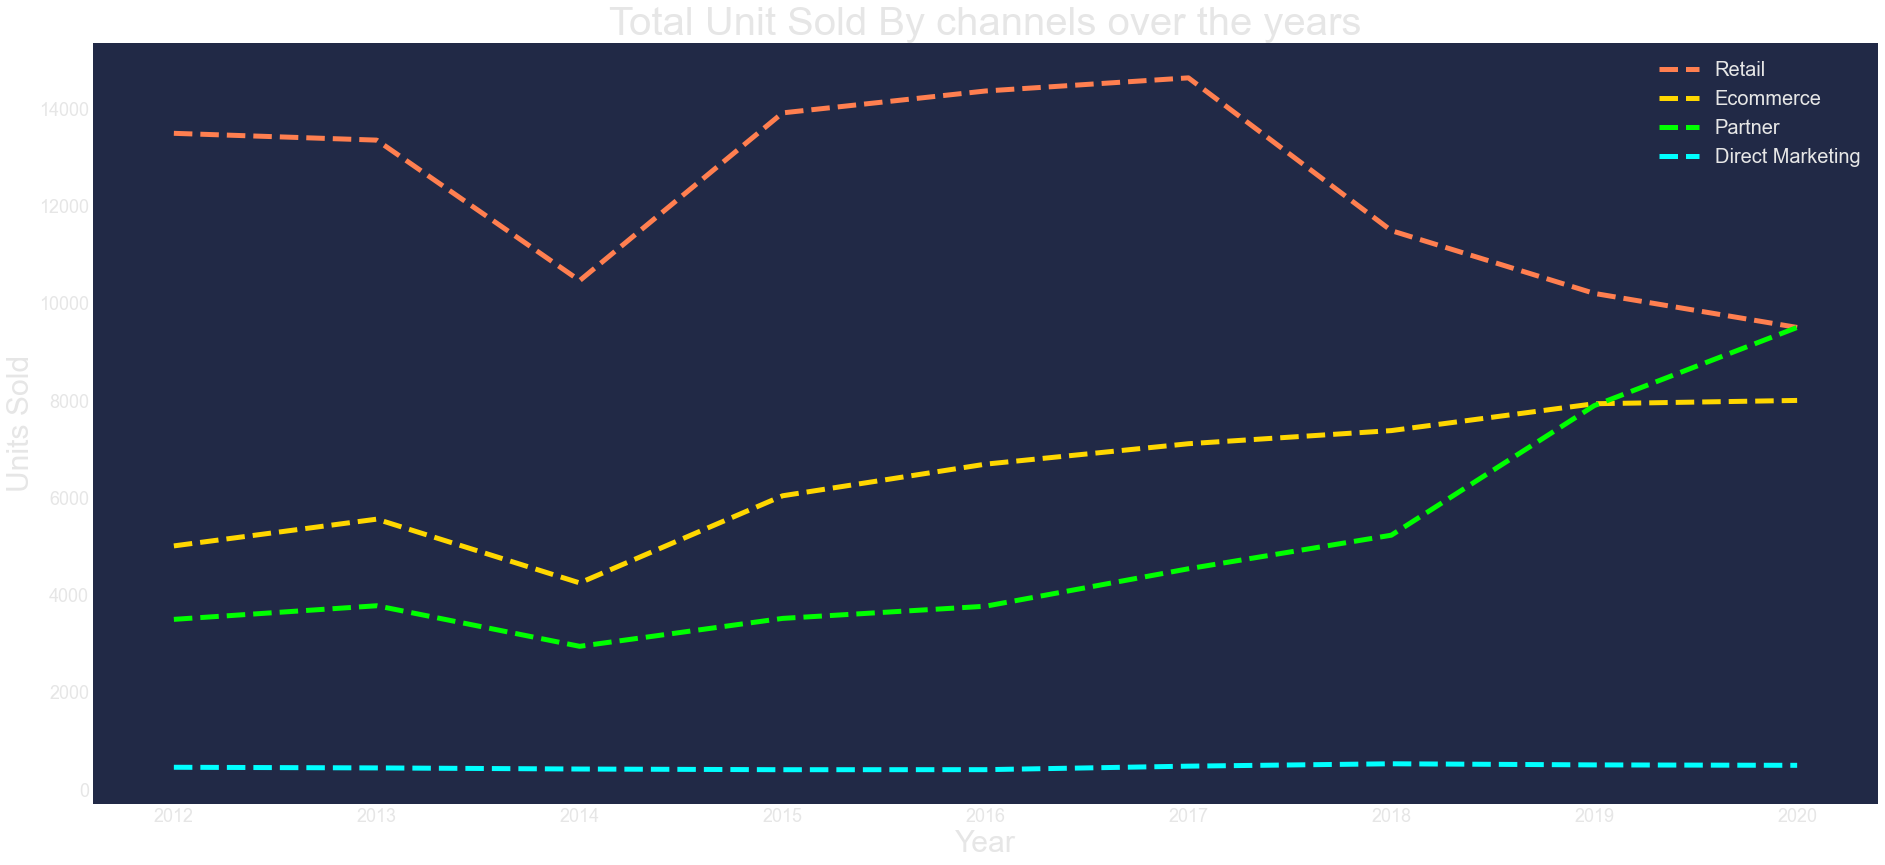

In [140]:
plt.figure(figsize = (32,14))
plt.plot(data_unit['Year'],data_unit['Retail'],label='Retail',color='coral',linestyle='dashed',linewidth=5, markersize=25)
plt.plot(data_unit['Year'],data_unit['Ecommerce'],label='Ecommerce',color='gold',linestyle='dashed',linewidth=5, markersize=25)
plt.plot(data_unit['Year'],data_unit['Partner'],label='Partner',color='lime',linestyle='dashed',linewidth=5, markersize=25)
plt.plot(data_unit['Year'],data_unit['Direct Marketing'],label='Direct Marketing',color='aqua',linestyle='dashed',linewidth=5, markersize=25)
plt.xlabel('Year',size=30)
plt.ylabel('Units Sold',size=30)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()
plt.title('Total Unit Sold By channels over the years',size=40)
plt.legend(fontsize=20)
plt.show()

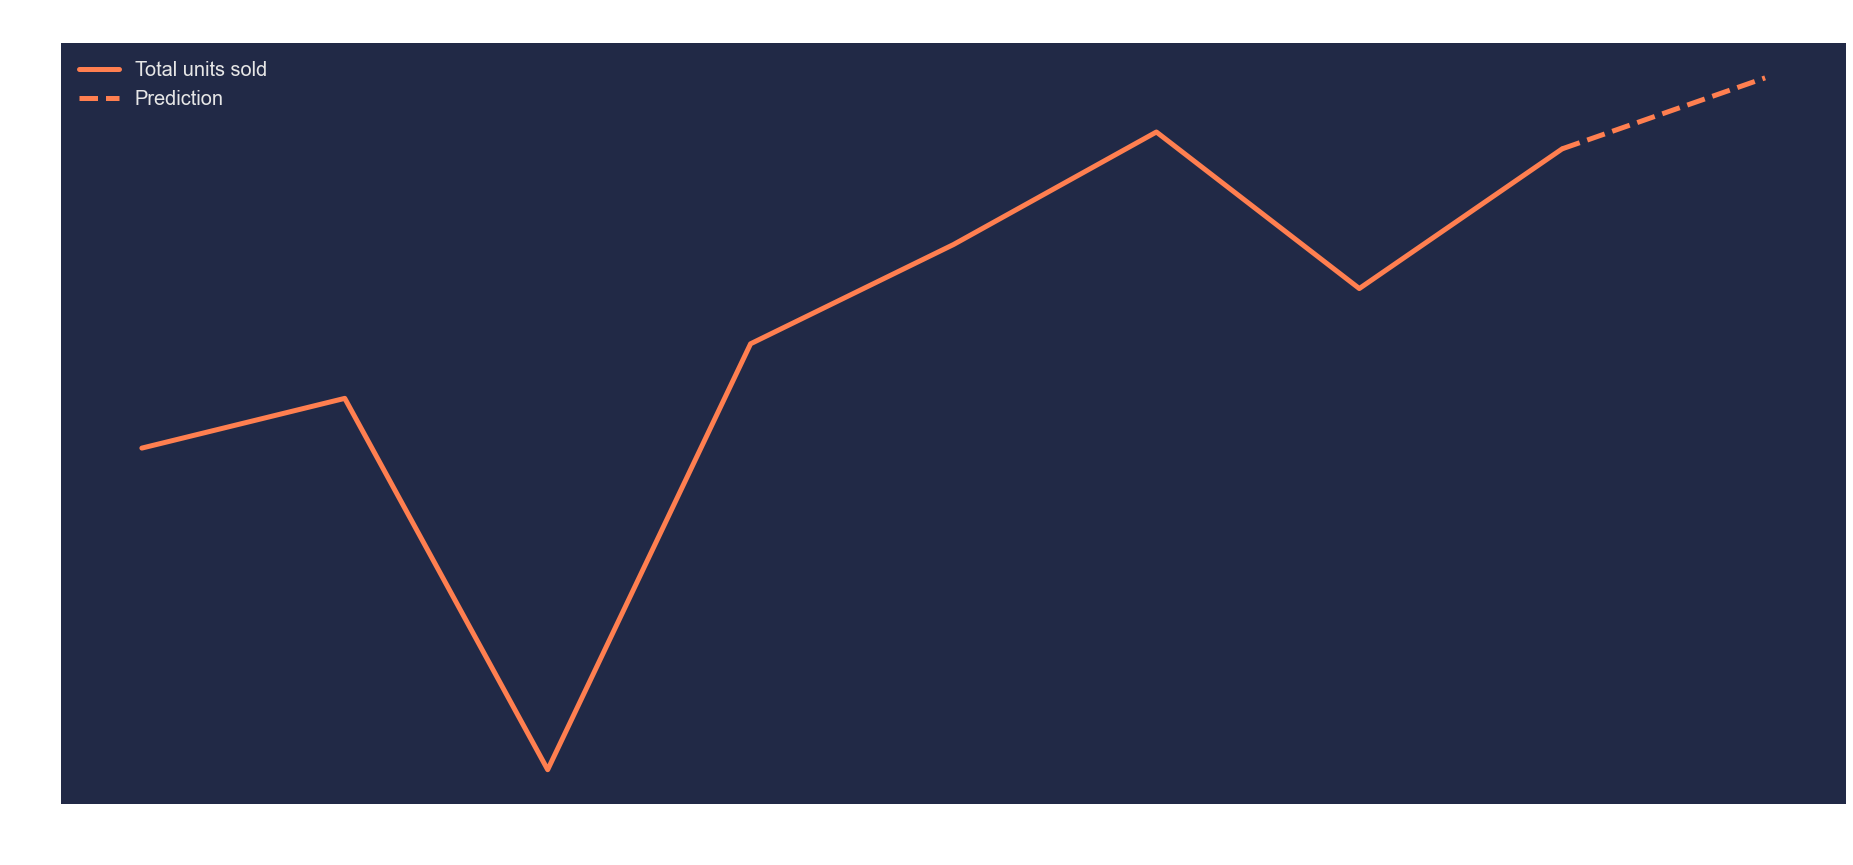

In [374]:
plt.figure(figsize = (32,14))
plt.plot(data_unit['Year'][0:-1], data_unit['Total'][0:-1],label="Total units sold",color='coral',linewidth=5, markersize=25)
plt.plot(data_unit['Year'][-2::],data_unit['Total'][-2::],label='Prediction',color='coral',linestyle='dashed',linewidth=5, markersize=25)
         
plt.xlabel('Year',size=30,color='white')
#plt.ylabel('Units Sold',size=30,color='black')
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid()
plt.title('Total Unit Sold over the years',size=40,color='white')
plt.legend(fontsize=20)
plt.show()

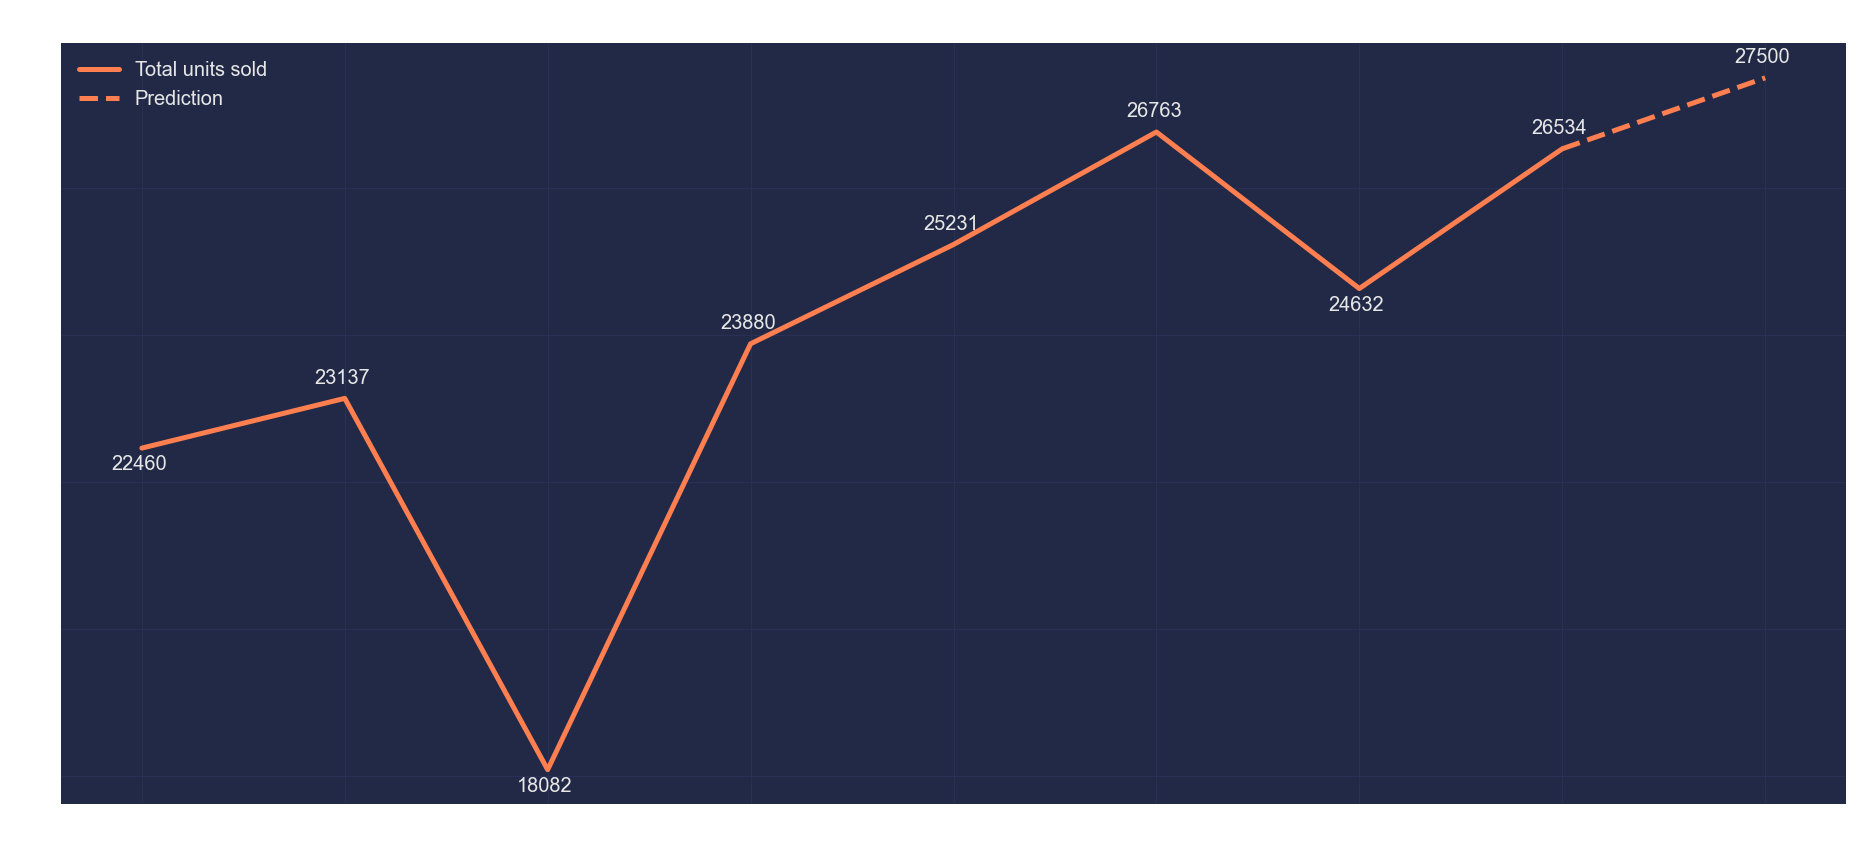

In [375]:
plt.figure(figsize = (32,14))
plt.plot(data_unit['Year'][0:-1], data_unit['Total'][0:-1],label="Total units sold",color='coral',linewidth=5, markersize=25)
plt.plot(data_unit['Year'][-2::],data_unit['Total'][-2::],label='Prediction',color='coral',linestyle='dashed',linewidth=5, markersize=25)

prev = 30000
for x,y in zip(data_unit.Year,data_unit.Total):
    if (y>prev):
        plt.text(x-0.15,y+200,int(y),size=20)
    else:
        plt.text(x-0.15,y-300,int(y),size=20)
    prev = y
    
plt.xlabel('Year',size=30,color='white')
#plt.ylabel('Units Sold',size=30,color='black')
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(visible=True,alpha=1)
plt.title('Total Unit Sold over the years',size=40,color='white')
plt.legend(fontsize=20)
plt.show()

In [267]:
for x,y in zip(data_unit.Year,data_unit.Total):
    plt.text(x,y,y,size=20)

2012 22460.0
2013 23137.0
2014 18082.0
2015 23880.0
2016 25231.0
2017 26763.0
2018 24632.0
2019 26534.0
2020 27500.0


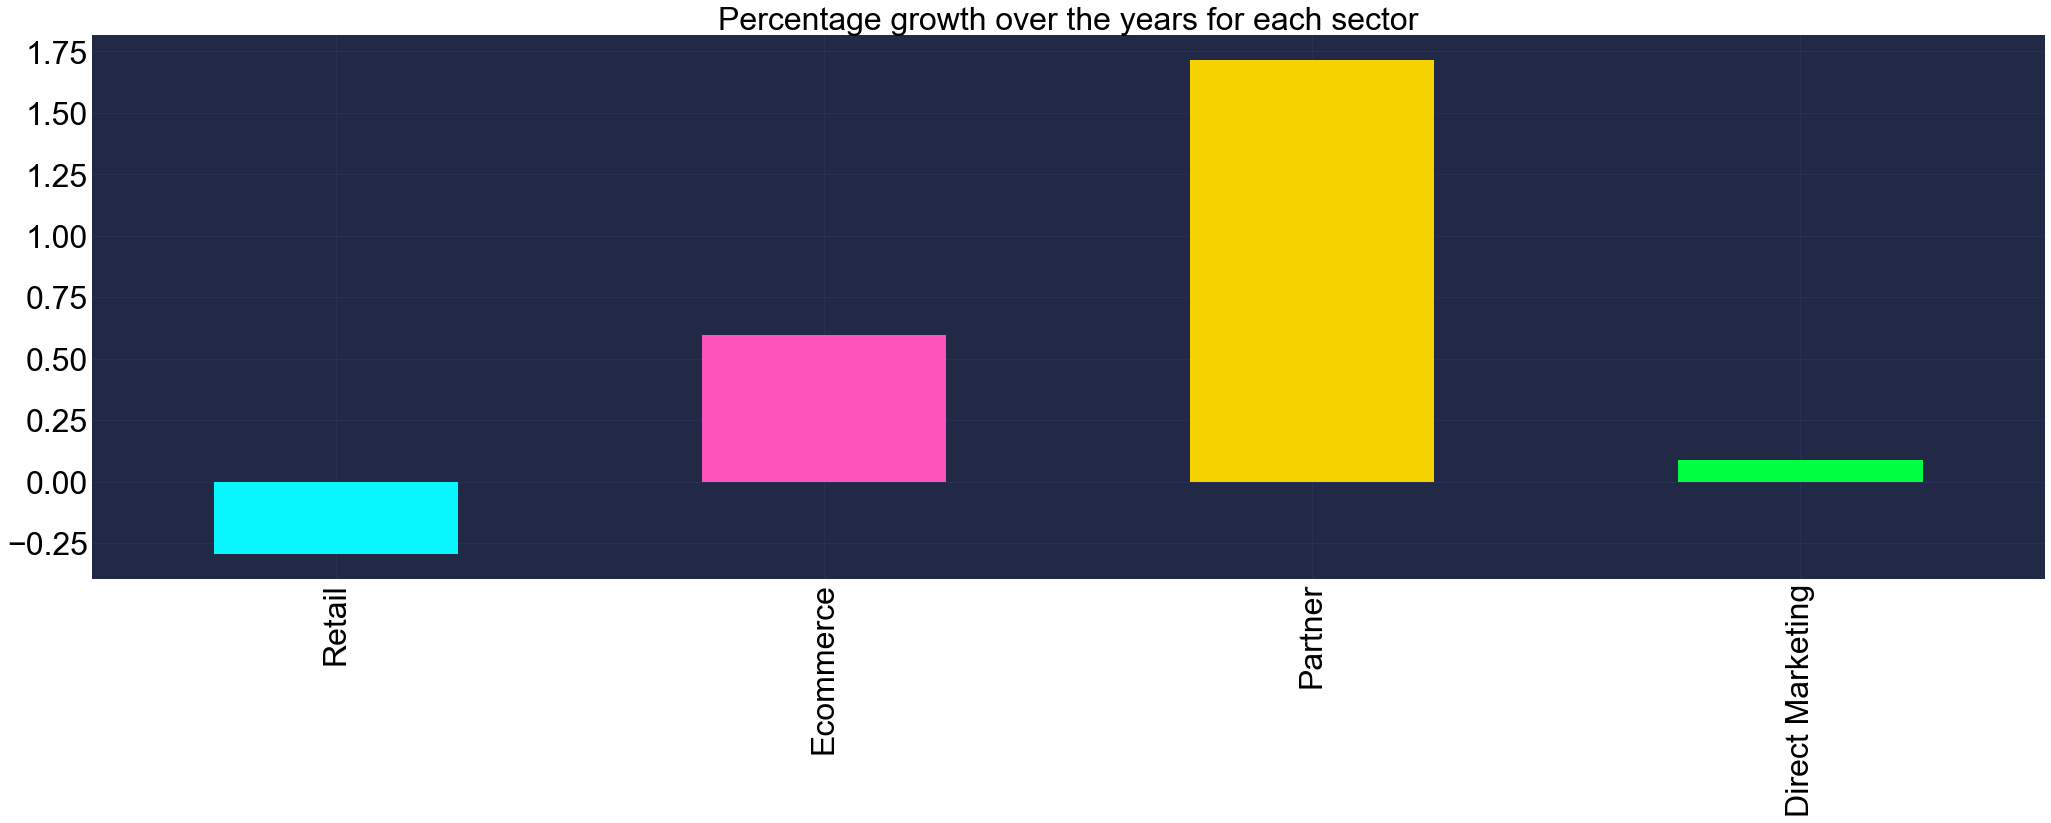

In [143]:
fig, ax = plt.subplots()

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
]
data_growth.plot(kind='bar', ax=ax, color=colors,legend=False, x='Sector', y='Growth',figsize=(35,10),
       grid=True,fontsize = 32)
plt.xlabel("")
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
ax.xaxis.label.set_color('black')   
ax.yaxis.label.set_color('black')
plt.title('Percentage growth over the years for each sector',size=32,color='black')
mplcyberpunk.add_glow_effects()

In [373]:
fig = px.histogram(data_growth, x='Sector', y='Growth', title="Percentage growth over the years for each sector",
                  text_auto=True)
fig.update_xaxes(title_text='Sector')
fig.update_yaxes(title_text='Percentage Growth')
fig

In [236]:
data_prcnt_100 = (data_prcnt.drop(columns='Year')*100).apply(lambda x:round(x,2))

In [239]:
data_prcnt_100.insert(0,"Year",data_prcnt.Year)

In [237]:
data_prcnt

,Year,Retail,Ecommerce,Partner,Direct Marketing,Total
0,2012,0.600623,0.223063,0.155833,0.020481,1.0
1,2013,0.576998,0.240308,0.163375,0.019320,1.0
2,2014,0.578642,0.234985,0.162924,0.023449,1.0
3,2015,0.582496,0.252931,0.147404,0.017169,1.0
4,2016,0.569141,0.265150,0.149419,0.016289,1.0
5,2017,0.546650,0.265665,0.169637,0.018047,1.0
6,2018,0.466466,0.299610,0.212325,0.021598,1.0
7,2019,0.384412,0.298937,0.297467,0.019183,1.0
8,2020,0.345455,0.290909,0.345455,0.018182,1.0


In [244]:
data_prcnt_100#.groupby("Year")

,Year,Retail,Ecommerce,Partner,Direct Marketing,Total
0,2012,60.06,22.31,15.58,2.05,100.0
1,2013,57.70,24.03,16.34,1.93,100.0
2,2014,57.86,23.50,16.29,2.34,100.0
3,2015,58.25,25.29,14.74,1.72,100.0
4,2016,56.91,26.52,14.94,1.63,100.0
5,2017,54.67,26.57,16.96,1.80,100.0
6,2018,46.65,29.96,21.23,2.16,100.0
7,2019,38.44,29.89,29.75,1.92,100.0
8,2020,34.55,29.09,34.55,1.82,100.0


In [368]:
color_discrete_map = {"Retail": "lightsteelblue","Ecommerce":"steelblue","Partner":"blue","Direct Marketing":"darkblue"}

fig = px.bar(data_prcnt_100, x="Year", y=["Retail","Ecommerce","Partner","Direct Marketing"], text_auto=True,
            color_discrete_map=color_discrete_map)
fig.update_layout(
    title_text='Percentage units sold by channel', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Precentage of each channel', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    showlegend=True
)
fig.show()

In [371]:
color_discrete_map = {"Retail": "orange","Partner":"blue","Ecommerce":"darkgray","Direct Marketing":"lightgrey"}


fig = px.bar(data_prcnt_100, x="Year", y=["Retail","Ecommerce","Direct Marketing","Partner"],
            color_discrete_map=color_discrete_map)

fig.update_layout(
    title_text='Percentage units sold by channel', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    showlegend=True,
    plot_bgcolor="white"
)
fig.update_layout(legend_title_text="Channel")
fig.show()

In [331]:
color_discrete_map

{'Retail': 'red',
 'Ecommerce': 'gray',
 'Partner': 'blue',
 'Direct Marketing': 'gray'}